# Best strategies to improve for the marketing campaign
- Goal:
    To predict if the client will subscribe to a term deposit.

- Data information:
    1. Client data: age, job, marital, education, default, balance, housing, loan
    2. Contact data: contact, day, month, duration
    3. Other data: campaign, pdays, previous, poutcome
    4. Target data: deposit
    * the data is from direct marketing campaigns (phone calls) of a Portuguese banking institution
    * for more information: [Dataset](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)

- Process:
    1. Data preprocessing
    2. Machine learning model


## First step: data preprocessing

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
# examine all data
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [159]:
print(bank.shape)

(11162, 17)


In [160]:
# examine statistics
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


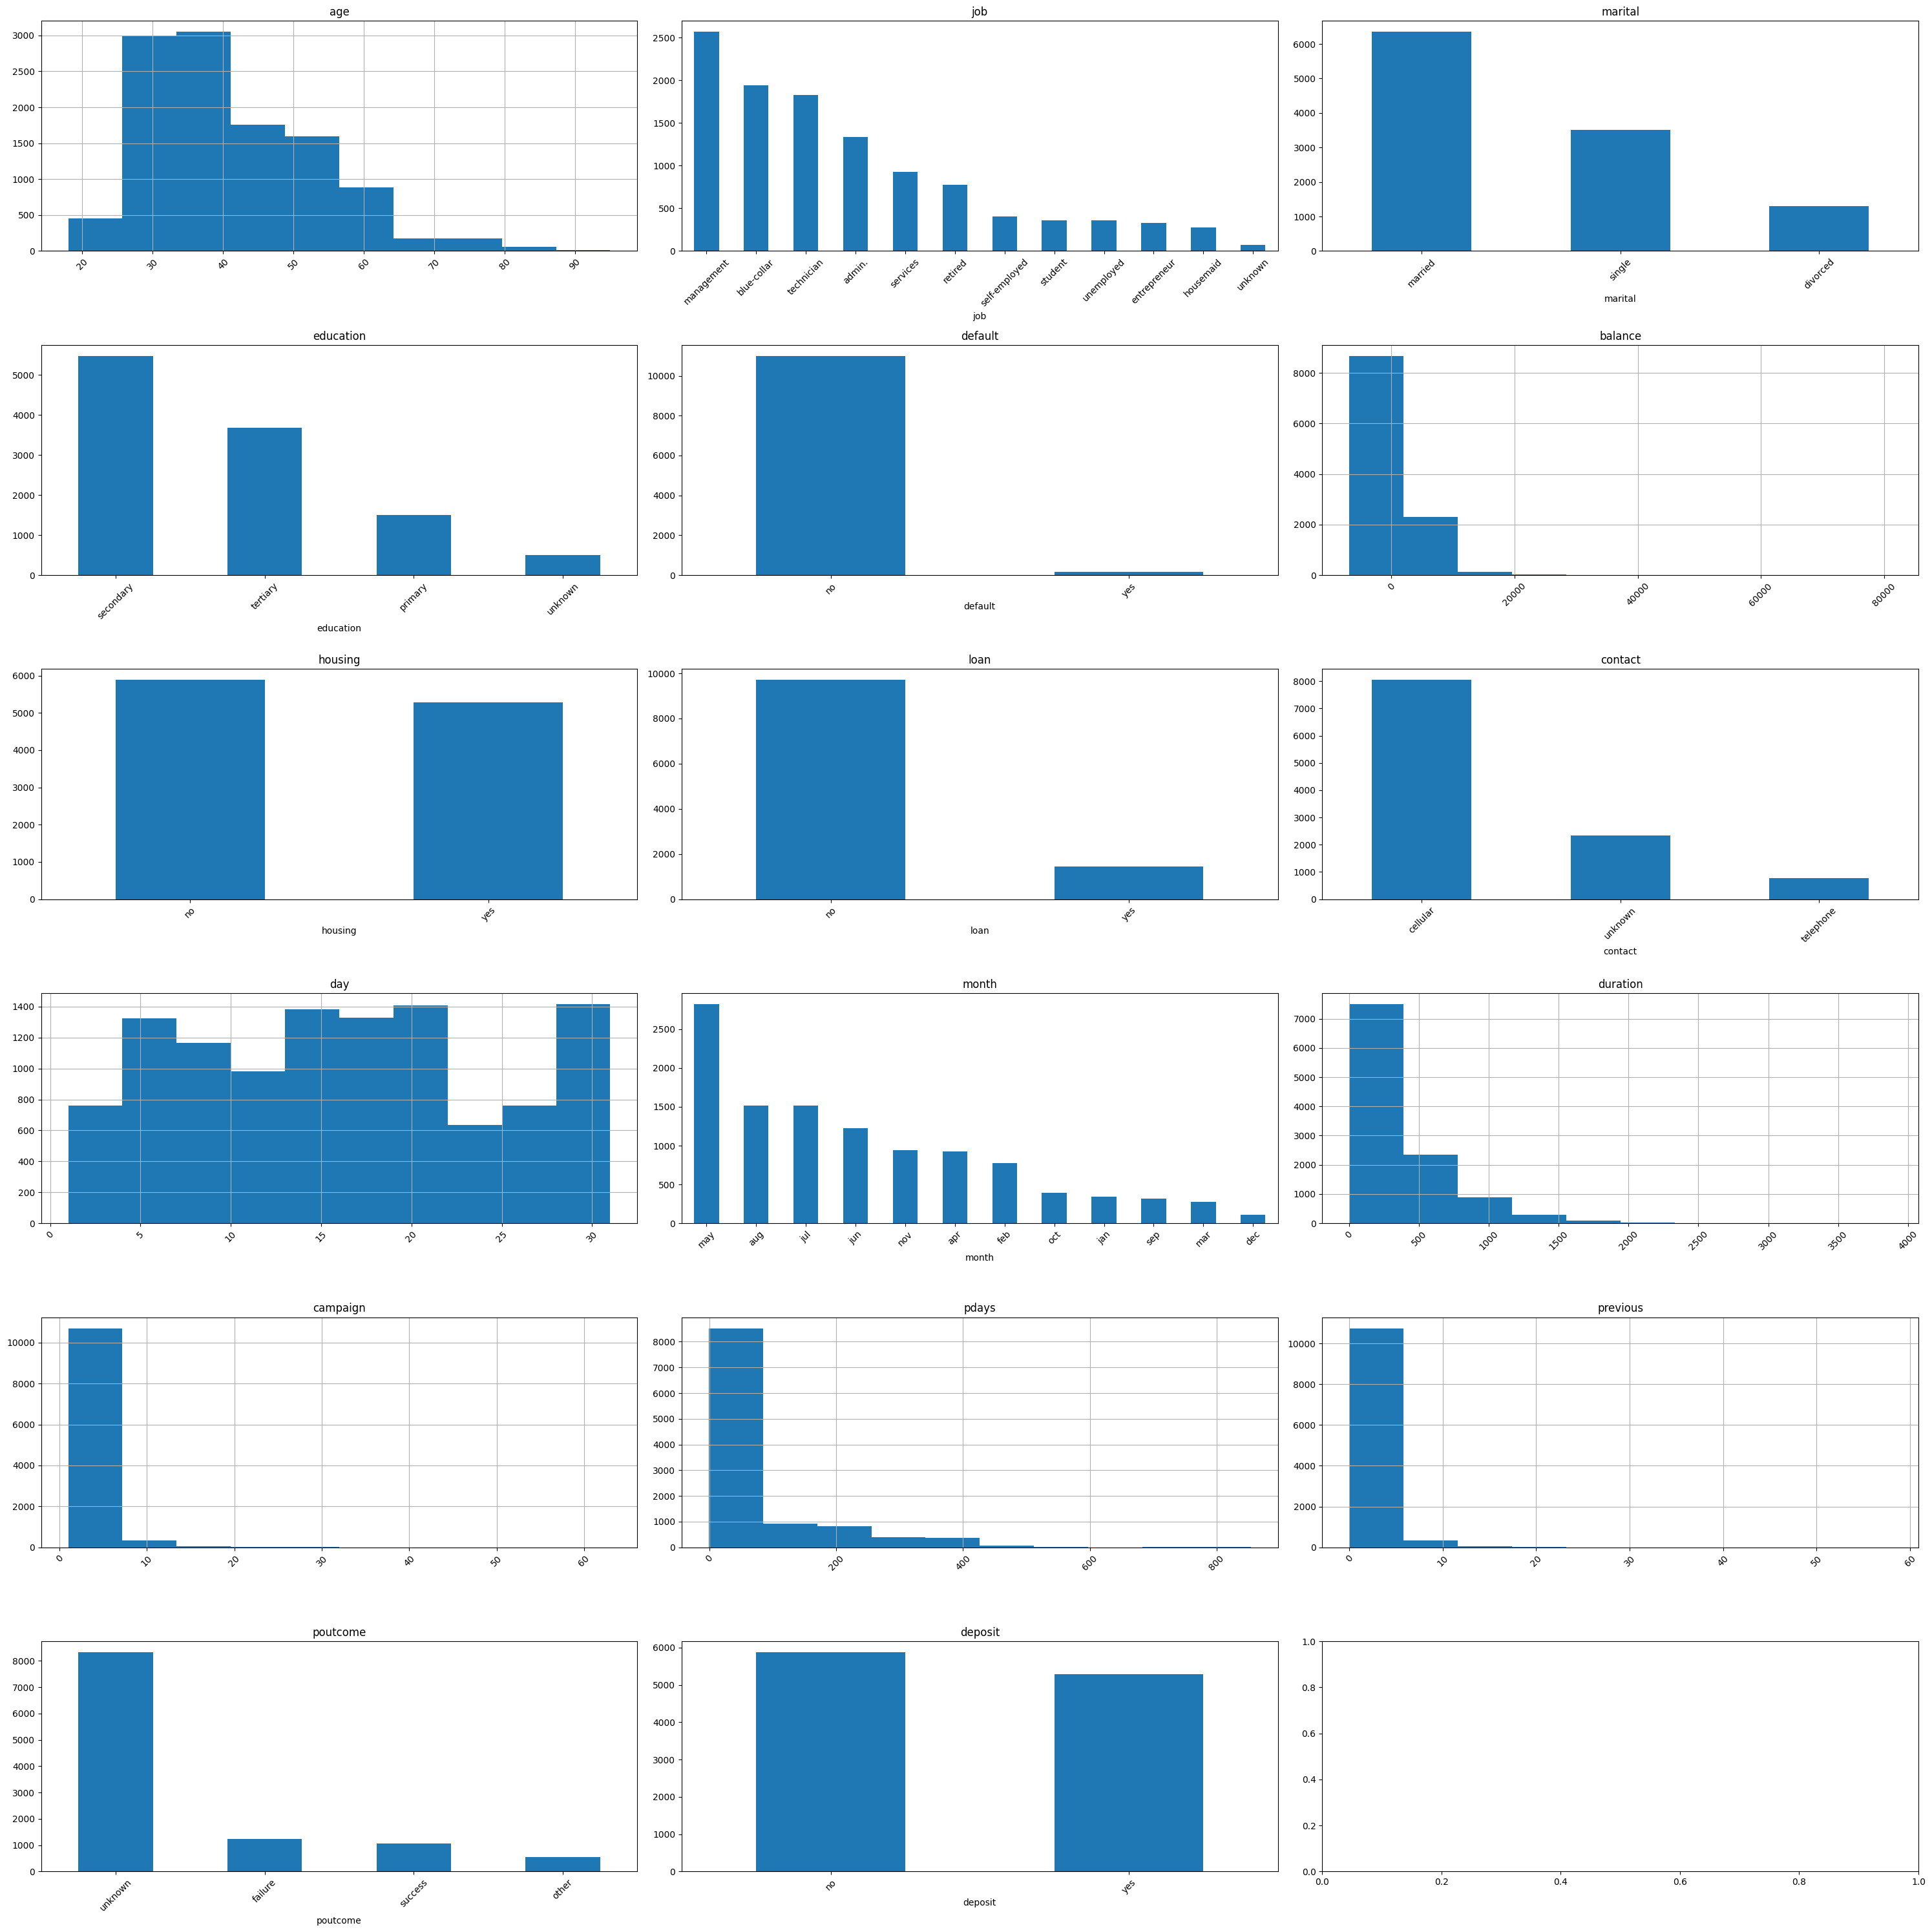

In [161]:
# eaxmine all the values in each column
n_cols = 3
n_rows = int(np.ceil(len(bank.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 5 * n_rows))

for i, c in enumerate(bank.columns):
    ax = axes[i // n_cols, i % n_cols]
    if bank[c].dtype == 'object': 
        bank[c].value_counts().plot(kind='bar', ax=ax)
    else:
        bank[c].hist(ax=ax)
    ax.set_title(c)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

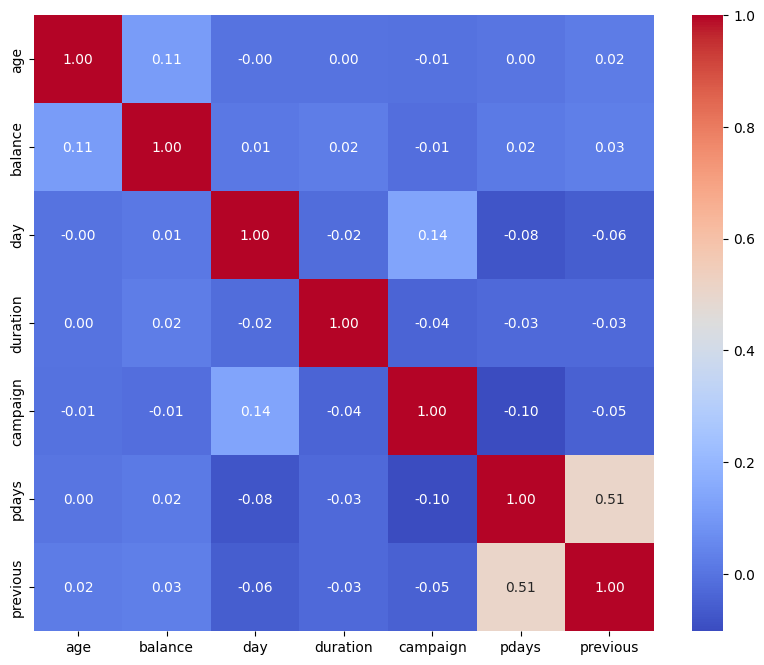

In [162]:
# examine the relationship between columns
numeric_cols = bank.select_dtypes(include=['int64', 'float64']).columns

corr = bank[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### client data

In [163]:
# examine client data only
bank_client = bank.iloc[:, 0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no


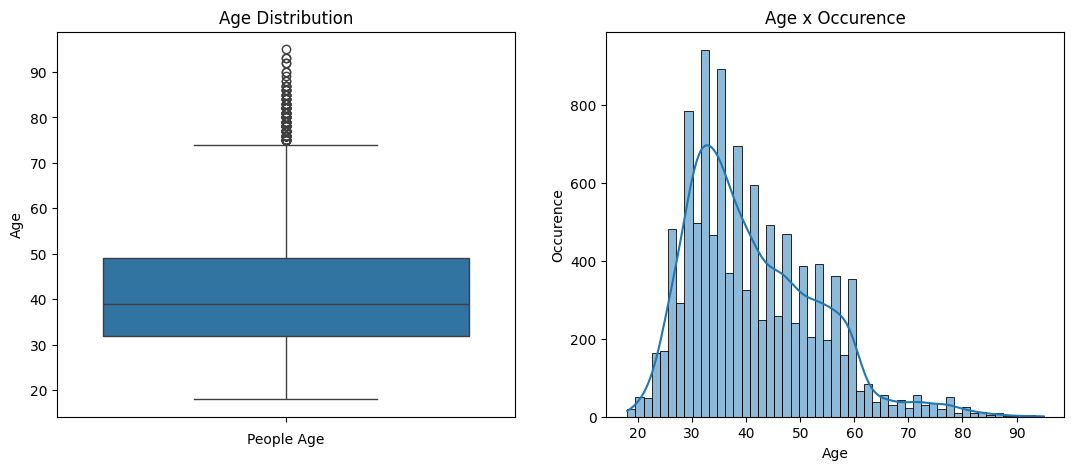

In [164]:
# plot client data
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(y='age', data=bank_client, ax=ax1)
ax1.set(xlabel='People Age', ylabel='Age', title='Age Distribution')
sns.histplot(bank_client['age'], ax=ax2, kde=True)
ax2.set(xlabel='Age', ylabel='Occurence', title='Age x Occurence')
plt.show()

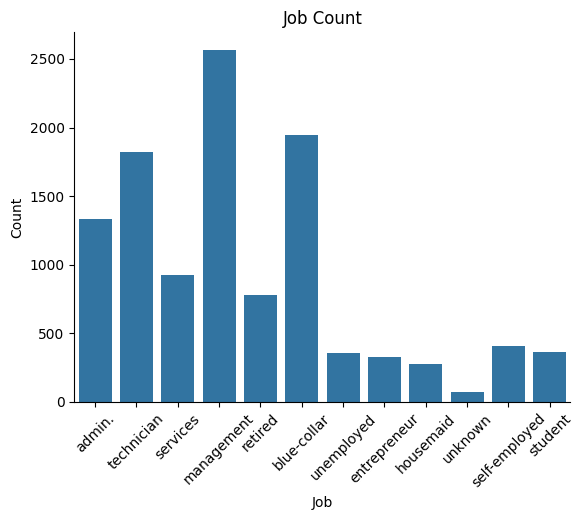

In [165]:
# plot client data
fig, ax = plt.subplots()
sns.countplot(x='job', data=bank_client)
ax.set(xlabel='Job', ylabel='Count', title='Job Count')
plt.xticks(rotation=45)
sns.despine()
plt.show()

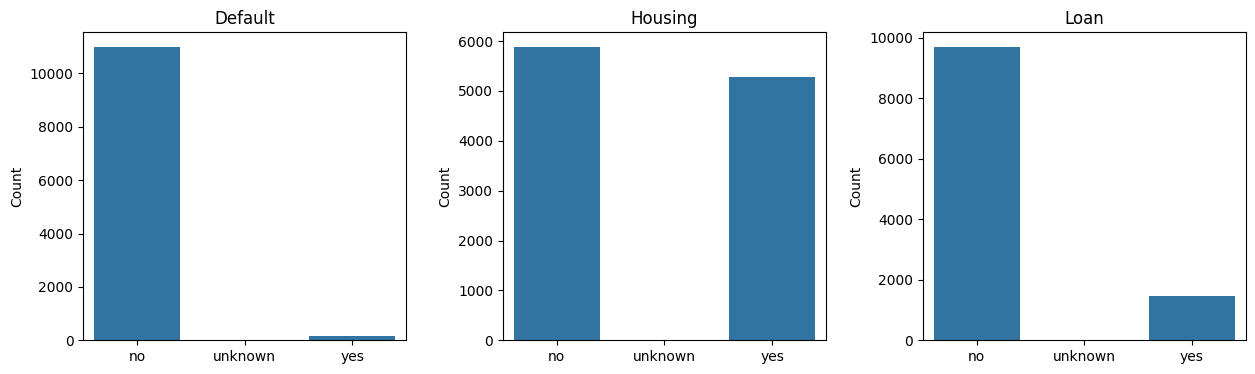

In [166]:
# plot client data
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

sns.countplot(x='default', data=bank_client, ax= ax1, order=['no', 'unknown', 'yes'])
ax1.set(xlabel='', ylabel='Count', title='Default')

sns.countplot(x='housing', data=bank_client, ax=ax2 , order=['no', 'unknown', 'yes'])
ax2.set(xlabel='', ylabel='Count', title='Housing')

sns.countplot(x='loan', data=bank_client, ax=ax3 , order=['no', 'unknown', 'yes'])
ax3.set(xlabel='', ylabel='Count', title='Loan')

plt.subplots_adjust(wspace=0.3)
plt.show()

### contact data

In [167]:
# contact data
bank_related = bank.iloc[:, 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,1042
1,unknown,5,may,1467
2,unknown,5,may,1389
3,unknown,5,may,579
4,unknown,5,may,673


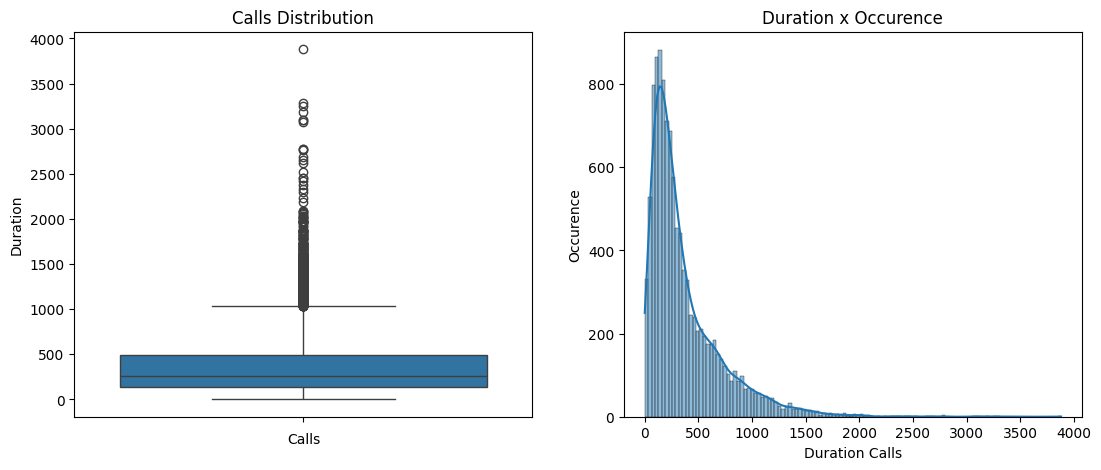

In [168]:
# plot contact data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
sns.boxplot(y='duration', data=bank_related, ax=ax1)
ax1.set(xlabel='Calls', ylabel='Duration', title='Calls Distribution')

sns.histplot(bank_related['duration'], kde=True, ax=ax2)
ax2.set(xlabel='Duration Calls', ylabel='Occurence', title='Duration x Occurence')

plt.show()

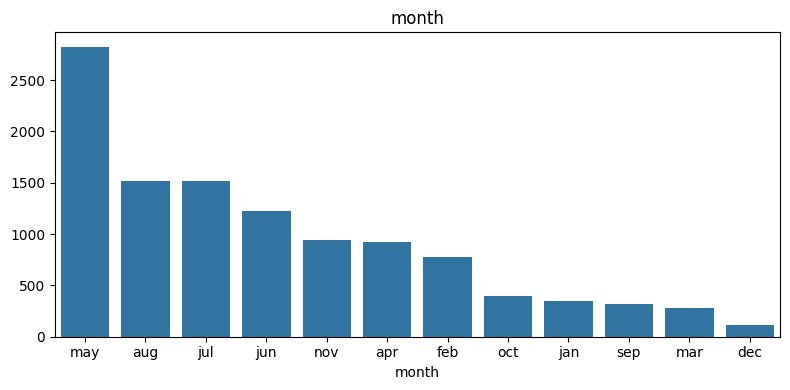

In [169]:
plt.figure(figsize=(8,4))
sns.barplot(x=bank['month'].value_counts().index, y=bank['month'].value_counts().values)
plt.title('month')
plt.tight_layout()

In [170]:
bank['month'].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

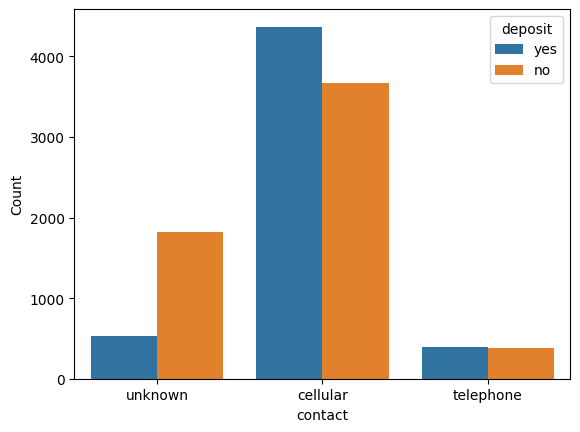

In [171]:
sns.countplot(x='contact', hue='deposit', data=bank)
plt.xlabel('contact')
plt.ylabel('Count')
plt.show()

In [172]:
month_map = {'may':5, 'aug':4, 'jul':4, 'jun':4, 'nov': 3, 'apr': 3, 'feb':3, 'oct':2, 'jan':2, 'sep':2, 'mar':2, 'dec': 1}

bank_related['month'] = bank_related['month'].map(month_map)

### other data

In [173]:
bank_o = bank.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,2,-1,0,unknown


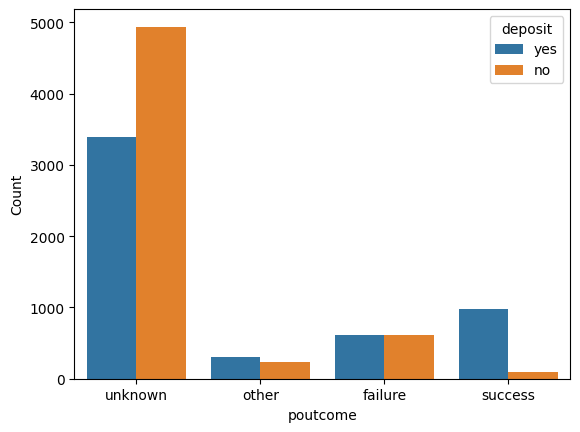

In [174]:
sns.countplot(x='poutcome', hue='deposit', data=bank)
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.show()

### encoding

<Axes: xlabel='default', ylabel='count'>

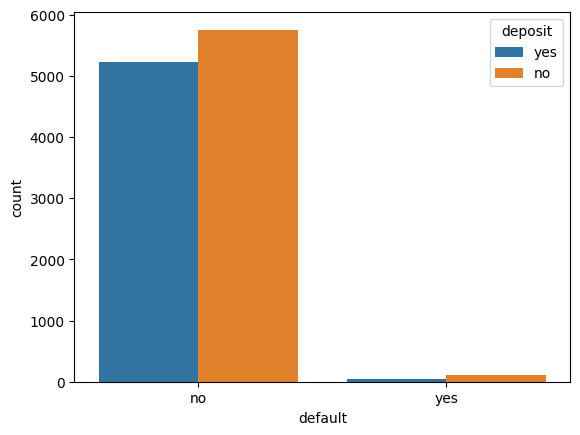

In [175]:
sns.countplot(x='default', hue='deposit', data=bank)

In [176]:
# encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bank_client['education'] = encoder.fit_transform(bank_client['education'])
bank_client['default'] = encoder.fit_transform(bank_client['default'])
bank_client['housing'] = encoder.fit_transform(bank_client['housing'])
bank_client['loan'] = encoder.fit_transform(bank_client['loan'])
bank_related['day'] = encoder.fit_transform(bank_related['day'])


In [177]:
bank['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [178]:
contact_encoded = pd.get_dummies(bank_related['contact']).astype(int)
contact_encoded = contact_encoded.iloc[:, :-1]
contact_encoded

,cellular,telephone
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
11157,1,0
11158,0,0
11159,1,0
11160,1,0


In [179]:
# encoding
poutcome_encoded = pd.get_dummies(bank_o['poutcome'], drop_first=True).astype(int)

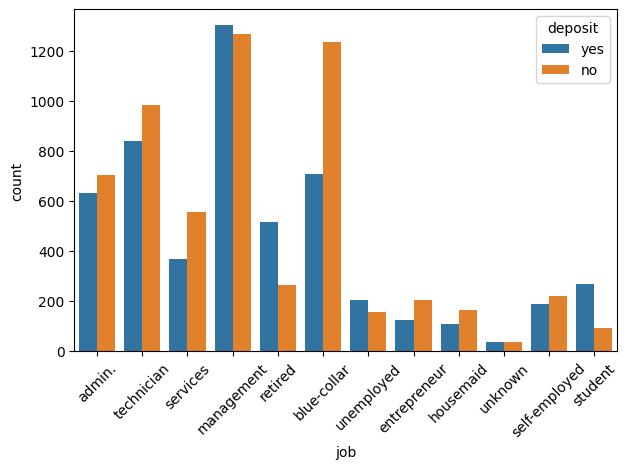

In [180]:
sns.countplot(x='job', hue='deposit', data=bank)
plt.xticks(rotation=45)
plt.tight_layout()

In [181]:
# encoding
job_encoded = pd.get_dummies(bank_client['job']).astype(int)
job_encoded = job_encoded.iloc[:, :-1] 

In [182]:
# encoding
marital_encoded = pd.get_dummies(bank_client['marital'],drop_first=True).astype(int)
marital_encoded

,married,single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
11157,0,1
11158,1,0
11159,0,1
11160,1,0


In [183]:
# encoding: using qcut, according to quantile
bank_client['age'] = pd.qcut(bank_client['age'], 4, labels=[1, 2, 3, 4])
bank_client['age'].head()

0    4
1    4
2    3
3    4
4    4
Name: age, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

### completed dataset

In [184]:
# features
bank_all = pd.concat([bank_client, bank_related, bank_o, marital_encoded, job_encoded, contact_encoded, poutcome_encoded], axis = 1)
bank_all = bank_all.drop(['job', 'marital', 'contact', 'poutcome'], axis=1)
bank_all.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,self-employed,services,student,technician,unemployed,cellular,telephone,other,success,unknown
0,4,1,0,2343,1,0,4,5,1042,1,...,0,0,0,0,0,0,0,0,0,1
1,4,1,0,45,0,0,4,5,1467,1,...,0,0,0,0,0,0,0,0,0,1
2,3,1,0,1270,1,0,4,5,1389,1,...,0,0,0,1,0,0,0,0,0,1
3,4,1,0,2476,1,0,4,5,579,1,...,0,1,0,0,0,0,0,0,0,1
4,4,2,0,184,0,0,4,5,673,2,...,0,0,0,0,0,0,0,0,0,1


In [185]:
# target
bank['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [186]:
# target
y = pd.get_dummies(bank['deposit'], drop_first=True).astype(int)
y.value_counts()

yes
0      5873
1      5289
Name: count, dtype: int64

## Second step: Machine learning model

In [187]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bank_all, y, test_size=0.3, random_state=201)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7813, 30) (3349, 30) (7813, 1) (3349, 1)


In [188]:
# standardization
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.transform(x_test)

In [189]:
# model
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(x_train, y_train)
pred = model.predict(x_test)

c:\Users\e81015\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


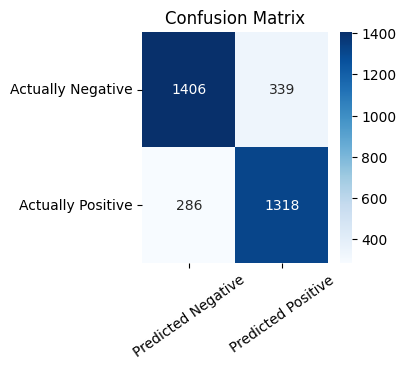

Accuracy: 0.8133771275007465


In [190]:
# evaluation
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm = pd.DataFrame(cm, index=['Actually Negative', 'Actually Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# plot cm
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
plt.xticks(rotation=35)
plt.show()

# accuracy
accuracy = (cm.iloc[0][0]+cm.iloc[1][1]) / (cm.iloc[0][0]+cm.iloc[0][1]+cm.iloc[1][0]+cm.iloc[1][1])
print('Accuracy:', accuracy)